在原本代码 `Neural Networks writing number.ipynb` 的基础上加入数据增强（对图像的平移操作）和卷积层，汇聚层. 对于自己绘制的手写数据已经能由很好的识别效果.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 20  # 固定字体大小
plt.rcParams['font.sans-serif']=['SimSun'] # 用来正常显示中文标签，使用宋体
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号
mnist = keras.datasets.mnist  # 载入
(train, train_y), (test, test_y) = mnist.load_data()  # 分解为训练数据和测试数据
train, test = train / 255, test / 255

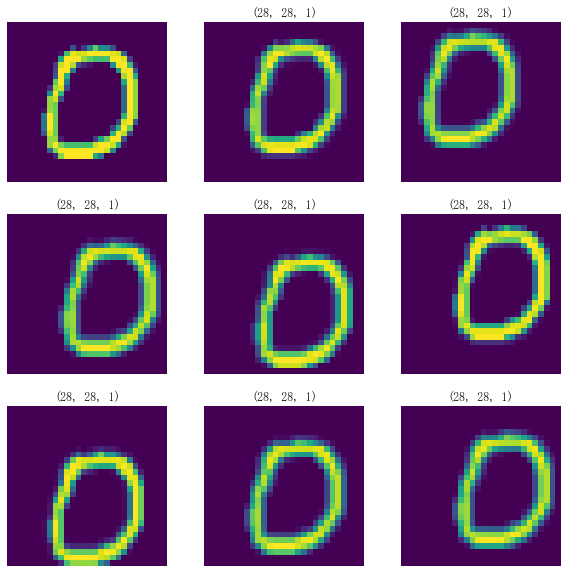

In [2]:
augmentation = keras.Sequential([
    layers.RandomTranslation(0.15, 0.15, fill_mode='constant', input_shape=(28, 28, 1))
    #layers.RandomHeight(0.2, input_shape=(28, 28, 1))
])
idx = 10
plt.figure(figsize=(10, 10))
plt.subplot(3, 3, 1)
plt.imshow(test[idx])
plt.axis('off')
for i in range(8):
    plt.subplot(3, 3, i + 2)
    tmp = augmentation(np.array([test[idx]]))
    plt.imshow(tmp[0])
    plt.axis('off')
    plt.title(str(tmp[0].shape))
plt.show()

In [3]:
model = keras.Sequential([
    layers.RandomTranslation(0.15, 0.15, input_shape=(28, 28, 1)),  # augmentation
    layers.Conv2D(64, (3, 3), activation='relu'),  # converlution
    layers.MaxPool2D(),
    layers.Flatten(),   # input layer
    layers.Dense(128, activation='relu'),    # hidden layer
    layers.Dense(10, activation='softmax')  # output layer
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_translation_1 (Random (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1384576   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
____________________________________________

In [4]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',  # 交叉熵
             metrics=['accuracy'])  # 准确率作为判断指标
model.fit(train, train_y, epochs=10, validation_data=(test, test_y))

Epoch 1/10
1875/1875 [==============================] - 12s 4ms/step - loss: 0.3484 - accuracy: 0.8924 - val_loss: 0.0889 - val_accuracy: 0.9723
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1367 - accuracy: 0.9585 - val_loss: 0.0874 - val_accuracy: 0.9715
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1075 - accuracy: 0.9662 - val_loss: 0.0700 - val_accuracy: 0.9762
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0917 - accuracy: 0.9715 - val_loss: 0.0494 - val_accuracy: 0.9842
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0815 - accuracy: 0.9748 - val_loss: 0.0497 - val_accuracy: 0.9839
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0741 - accuracy: 0.9772 - val_loss: 0.0524 - val_accuracy: 0.9823
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0703 - accuracy: 0.9784 - val_loss: 0.0438 - val_accuracy

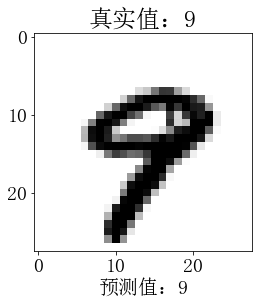

In [5]:
plt.rcParams['font.size'] = 20  # 固定字体大小
def check(n):
    predict = np.argmax(model.predict(test)[n])  # 返回预测值
    plt.imshow(test[n], cmap=plt.cm.binary)
    plt.title('真实值：' + str(test_y[n]))
    plt.xlabel('预测值：' + str(predict))
    plt.show()
check(9)

In [ ]:
# 输出前10个错误预测结果
cnt = 10
result = model.predict(test)
for i in range(test.shape[0]):
    predict = np.argmax(result[i])
    if predict != test_y[i]:
        check(i)
        cnt -= 1
    if cnt == 0:
        break

### 自定义测试样本
可以通过画图工具修改目录下的 `test.png` 文件，用于自定义预测数据，看看能否识别自己写的数字！

[2.2116816e-02 2.0064504e-05 2.9585024e-05 1.8970321e-04 1.2702744e-03
 5.2031112e+00 9.4374352e+01 2.1363432e-02 3.7583673e-01 1.7164404e-03]


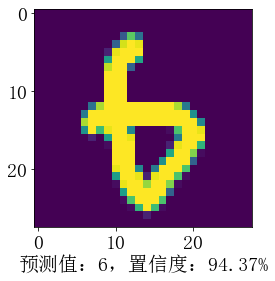

In [7]:
from PIL import Image  # 用于转换图像
def my_test():
    image = Image.open('test.png')
    image = image.convert('L')
    mytest = np.array(image)
    mytest = (255 - mytest) / 255
    mytest = mytest.reshape(1, 28, 28, 1)
    predict = model.predict(mytest)[0]
    score = predict / np.sum(predict) * 100
    print(score)
    plt.imshow(mytest[0])
    plt.xlabel('预测值：{}，置信度：{:.2f}%'.format(np.argmax(predict), np.max(score)))
    plt.show()

my_test()